<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Use the following line for interactive plots. In case that there are problems just
# comment this out.
%matplotlib widget

## 12.6 Multiple Linear Regression Models

Start by generating data that are distributed around a 2D plane:

In [2]:
rng = np.random.default_rng(10)


# create 1D arrays representing the x and y coordinates:
xlim = (0, 1)
ylim = (0, 1)
x = np.linspace(*xlim, 20)
y = np.linspace(*ylim, 20)


# define weights based on which data are sampled:
w0, w1, w2 = 1, 0.1, 0.2
w = np.array([w0, w1, w2]).reshape(-1, 1)

# Create the coordinates of # the true function which is a 2D plane: 
# create 2D arrays for visualizing the plane using `plot_wireframe`:
XX, YY = np.meshgrid(x, y)
w_true = w.copy()            # store for later use
ZZ_true = w_true[0] + w_true[1] * XX + w_true[2] * YY

# Jitter the two coordinates a bit and create the feature matrix X
n_total_data = 300
X1 = (xlim[1] - xlim[0]) * rng.random(n_total_data) + xlim[0]
X2 = (ylim[1] - ylim[0]) * rng.random(n_total_data) + ylim[0]
X = np.vstack((np.ones_like(X1), X1, X2)).T

# Use the equation of a plane and superimpose the values with some
# Gaussian noise:
y_noise_amplitude = 0.1
y_noise = y_noise_amplitude * (rng.normal(0, 0.1, size=(n_total_data, 1)))
Y = X @ w + y_noise

Now, the two features are contained in X and the target is in Y. 

Next, create a 3D scatter plot and visualize the "true" plane given by the 3 weights $\mathbf{w}=[w_0, w_1, w_2]$:

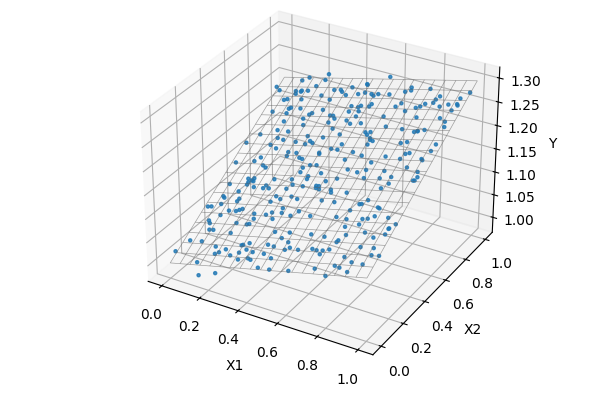

In [3]:

# Create a figure with axis `ax0` and then add a 3d axis `ax`, 
# We used ax0 only temporarily so that we can position axis `ax` on the figure
# using `add_axes`. This is a hack for fixing the problem that in 3d plots sometimes 
# the  x/y/z-labels or ticks are outside the visible area. 
fig, ax0 = plt.subplots(figsize=(6, 4)) 
ax = fig.add_axes([0.08, 0.05, 0.9, 1], projection='3d')  # (left, bottom, width, height)
ax0.set_axis_off()  # make "invisible"

ax.plot_wireframe(XX, YY, ZZ_true, color='0.4', lw=0.5, alpha=0.6, label='true function $f$')
ax.scatter(X[:,1], X[:, 2], Y, marker='.', alpha=0.8, label='training data')
ax.set(xlabel='X1', ylabel='X2', zlabel='Y');

Here are "the usual" functions for computing the cost and the gradient of the cost:

In [4]:
def cost(weights, X1, X2, y):
    y_pred = weights[0] + weights[1] * X1 + weights[2] * X2
    mse = np.mean((y.ravel() - y_pred) ** 2)
    return mse

def gradient_of_cost(weights, X1, X2, y):
    y_pred = weights[0] + weights[1] * X1 + weights[2] * X2
    residual = y.ravel() - y_pred
    dL_dw0 = -2 * np.mean(residual)
    dL_dw1 = -2 * np.mean(residual * X1)
    dL_dw2 = -2 * np.mean(residual * X2)
    return np.array([dL_dw0, dL_dw1, dL_dw2])

The following steepest descent iteration is in full analogy to the 1D case:

In [5]:
maximum_number_of_steps = 100000
step_size = 0.02
tolerance = 1e-4
weights = np.array([0, 0.2, 0])

for step in range(maximum_number_of_steps):
    dL_dw = gradient_of_cost(weights, X1, X2, Y)
    delta_w = step_size * (-dL_dw)
    weights += delta_w

    if np.linalg.norm(delta_w) < tolerance:
        break
else:
    print("ERROR: maximum number of iterations exceeded")  

print(f'w0 = {weights[0]:.3f},   w1 = {weights[1]:.3f},   w2 = {weights[2]:.3f}')
print(f'{step + 1} steps taken')

w0 = 0.972,   w1 = 0.132,   w2 = 0.219
1168 steps taken


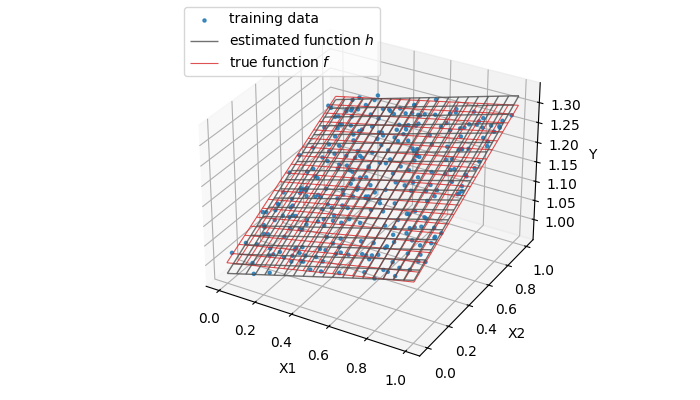

In [6]:
# Create a figure with axis `ax0` and then add a 3d axis `ax`, 
# We used ax0 only temporarily so that we can position axis `ax` on the figure
# using `add_axes`. This is a hack for fixing the problem that in 3d plots sometimes 
# the  x/y/z-labels or ticks are outside the visible area. 
fig, ax0 = plt.subplots(figsize=(7, 4)) 
ax = fig.add_axes([0.05, 0.05, 0.95, 0.95], projection='3d')  # (left, bottom, width, height)
ax0.set_axis_off()  # make "invisible"

# training data
ax.scatter(X1, X2, Y, marker='.', alpha=0.8, label='training data')

# fitted plane (=learned model)
ZZ = weights[0] + weights[1] * XX + weights[2] * YY
ax.plot_wireframe(XX, YY, ZZ, color='0.3', lw=1., alpha=0.8, label='estimated function $h$');

# true function
ZZ = w_true[0] + w_true[1] * XX + w_true[2] * YY
ax.plot_wireframe(XX, YY, ZZ, color='C3', lw=0.8, alpha=0.8, label='true function $f$')

ax.legend(loc='upper left')
ax.set(xlabel='X1', ylabel='X2', zlabel='Y');